In [1]:
# leave this line at the top http://stackoverflow.com/questions/23550056/figurecanvasagg-object-has-no-attribute-invalidate-python-plotting
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.available

['seaborn-deep',
 'seaborn-dark',
 'bmh',
 'ggplot',
 'seaborn-ticks',
 'grayscale',
 'seaborn-colorblind',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-darkgrid',
 'classic',
 'dark_background',
 'seaborn-pastel',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-bright',
 'seaborn-muted',
 'seaborn-whitegrid',
 'seaborn-white',
 'seaborn-talk',
 'seaborn-poster']

In [3]:
plt.style.use('seaborn-notebook')

# Intro
Adapted from the fantastic blog post
https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/
# Create dataset
Start with 4 time series and "unpivot" the table to get a dataframe with
- a datetime column
- a categorical column
- a numerical column

In [4]:
data = np.random.randn(4, 365).cumsum(axis=1)
dt = pd.date_range('2015-01-01', '2015-12-31')
timeseries_df = pd.DataFrame(data=dict(A=data[0], B=data[1], C=data[2], D=data[3]), index=dt)
timeseries_df.head()

,A,B,C,D
2015-01-01,-0.553032,1.377011,-1.844403,-0.582156
2015-01-02,0.031330,1.352284,-1.155303,-1.305377
2015-01-03,-0.481508,1.472097,-0.827655,-0.619999
2015-01-04,-0.670398,1.180843,-1.745762,-1.109250
2015-01-05,-0.902825,1.395864,-1.140415,-0.601537


In [5]:
def alternative_dataset():
    import pandas.util.testing as tm; 
    tm.N = 100
    return tm.makeTimeDataFrame()

In [6]:
def unpivot(frame):
    data = {'value' : frame.values.ravel('F'),
            'kind' : np.asarray(frame.columns).repeat(frame.shape[0]),
            'dt' : np.tile(np.asarray(frame.index), frame.shape[1])}
    return pd.DataFrame(data, columns=['dt', 'kind', 'value'])
df = unpivot(timeseries_df)
df.head()


,dt,kind,value
0,2015-01-01,A,-0.553032
1,2015-01-02,A,0.031330
2,2015-01-03,A,-0.481508
3,2015-01-04,A,-0.670398
4,2015-01-05,A,-0.902825


In [7]:
df.tail()

,dt,kind,value
1455,2015-12-27,D,-4.247228
1456,2015-12-28,D,-2.874084
1457,2015-12-29,D,-3.159187
1458,2015-12-30,D,-4.655614
1459,2015-12-31,D,-3.946491


# Lines plots with matplotlib
## Using a loop

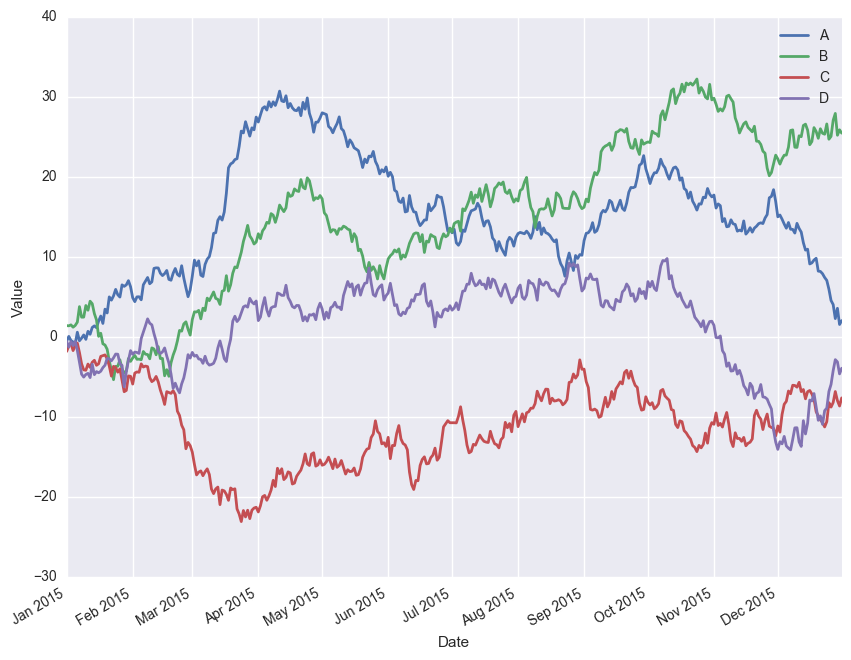

In [8]:
fig = plt.figure(1, figsize=(10,8))
kinds = df.kind.unique()
for k in kinds:
    data = df[df.kind == k]
    plt.plot(data.dt, data.value, lw=2)
fig.autofmt_xdate()
plt.ylabel('Value')
plt.xlabel('Date');
plt.legend(kinds)

## Using a pivot
We can pivot the data to get a dataframe where each column is a series to be ploted. These can be plotted directly by Matplotlib. 

In [9]:
dfp = df.pivot(index='dt', columns='kind', values='value')
dfp.head()

kind,A,B,C,D
dt,,,,
2015-01-01,-0.553032,1.377011,-1.844403,-0.582156
2015-01-02,0.031330,1.352284,-1.155303,-1.305377
2015-01-03,-0.481508,1.472097,-0.827655,-0.619999
2015-01-04,-0.670398,1.180843,-1.745762,-1.109250
2015-01-05,-0.902825,1.395864,-1.140415,-0.601537


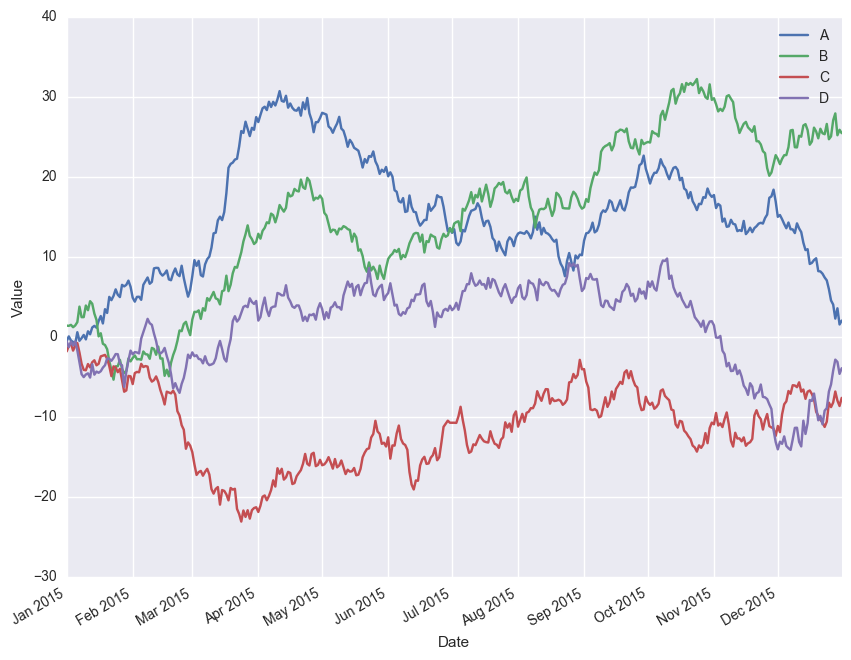

In [10]:
fig = plt.figure(2, figsize=(10, 8))
plt.plot(dfp);
plt.legend(dfp.columns)
fig.autofmt_xdate()
plt.ylabel('Value')
plt.xlabel('Date');

# Line plots with Pandas

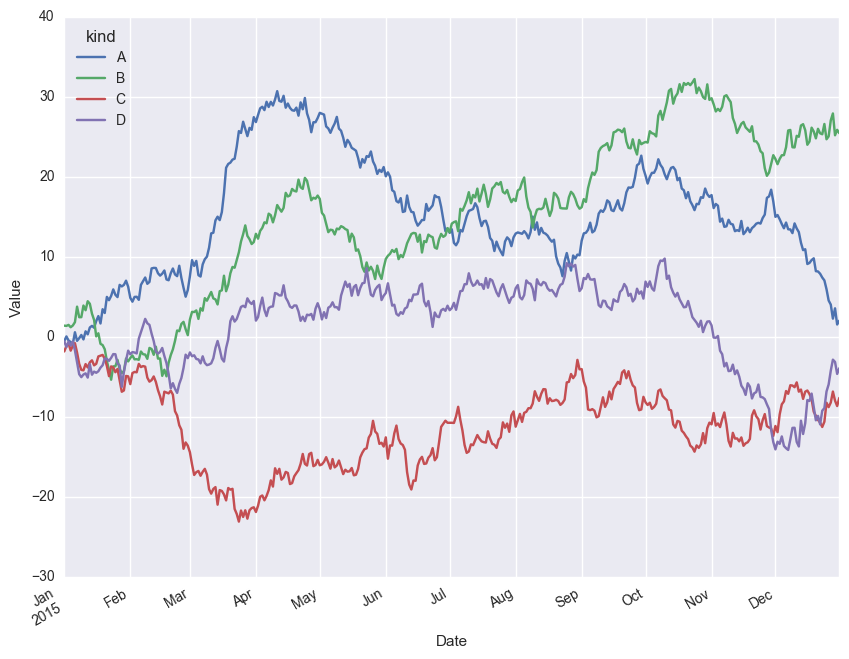

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
dfp.plot(ax=ax)
fig.autofmt_xdate()
plt.ylabel('Value')
plt.xlabel('Date');

## Line plots with Seaborn with FacetGrid

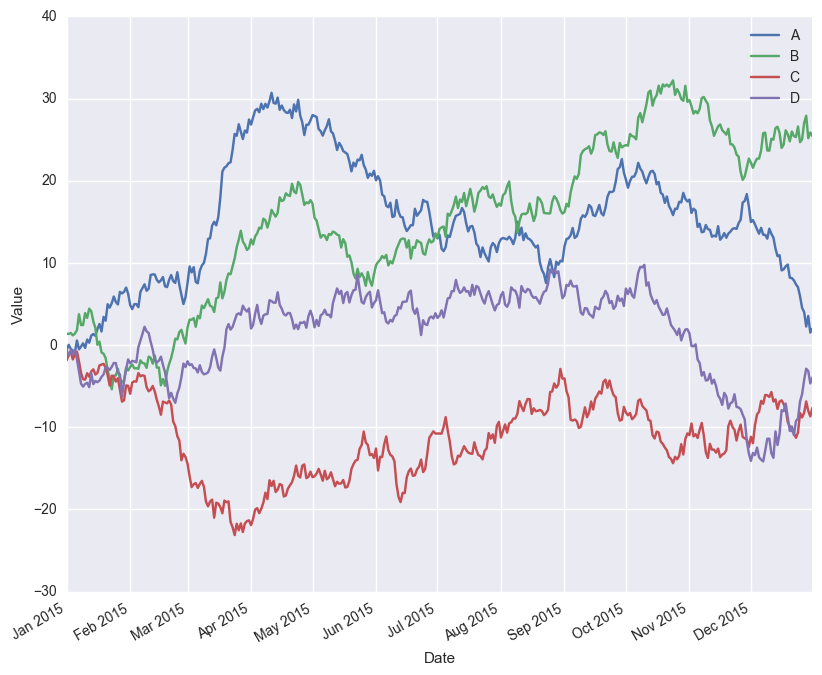

In [12]:
g = sns.FacetGrid(df, hue='kind', aspect=10/8)
g.map(plt.plot, 'dt', 'value')
plt.legend();
plt.ylabel('Value')
plt.xlabel('Date');
g.fig.autofmt_xdate()
g.fig.set_figwidth(10)
g.fig.set_figheight(8)


# Line plots with ggplot

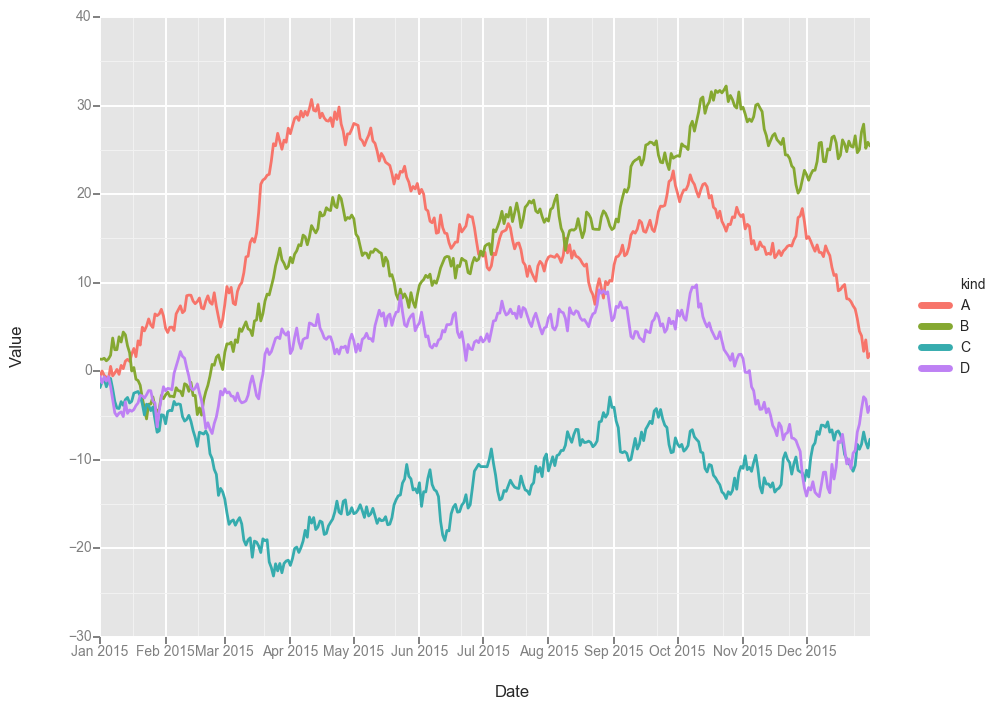

<ggplot: (-9223372036579506439)>

In [13]:
from ggplot import *
# GGPLOT
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
 
g = ggplot(df, aes(x='dt', y='value', color='kind')) + \
    geom_line(size=2.0) + \
    xlab('Date') + \
    ylab('Value')
g

# Line plots with Altair
Generates JSON for the Vega(-lite) library, built on top of D3. Potentially ground breaking and the API is very neat. 

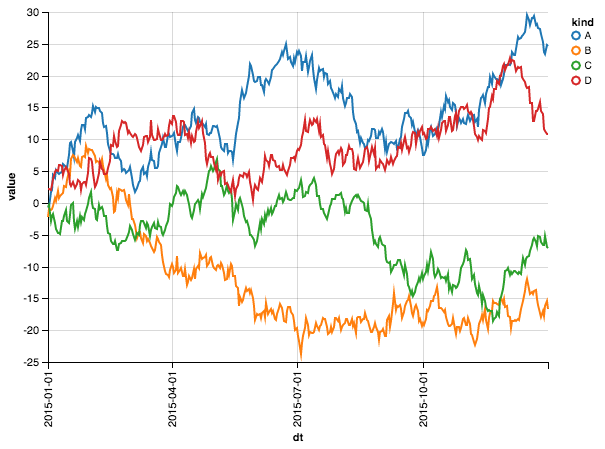

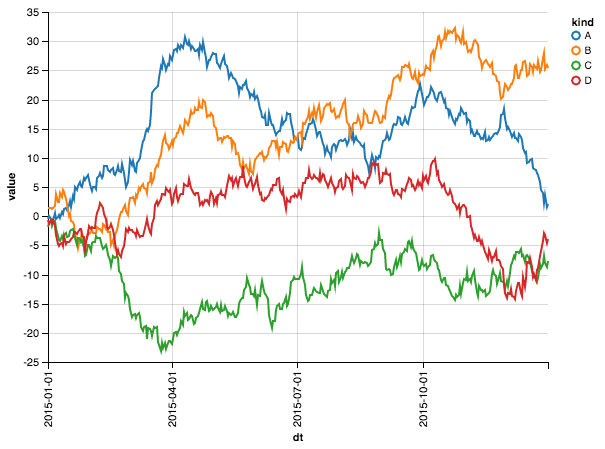

In [14]:
from altair import Chart
Chart(df).mark_line().encode(
    x='dt',
    y='value',
    color='kind'
)